# piecewise optimizer

## imports

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import math
import torch.nn.functional as F
import pickle
import time
import matplotlib.pyplot as plt
import FINDER_core

Using cuda device for FINDER


In [2]:
device = ("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

Using cuda device


## dataset

In [3]:
# Define transformation for input data
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL image to tensor
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize the image data
])

In [4]:
# Download MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

In [5]:
# Define data loaders
batch_size = int(len(train_dataset) /1)

# Define data loaders with full batch size
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

## FNN class

In [6]:
class FNN(nn.Module):
    def __init__(self):
        super(FNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input image
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x

    def loss_grad(self, param, inputs, labels, no_grad = False):
        inputs = inputs.to(device)
        labels = labels.to(device)
        '''
        zeroeing gradients
        '''
        torch.nn.utils.vector_to_parameters(param, self.parameters())
        self.zero_grad(set_to_none=True)
        
        '''
        loss and grads
        '''
        outputs = model(inputs)

        if no_grad == False:
            ls = criterion(outputs, labels)
            ls.backward()
            grads = torch.cat([param.grad.data.view(-1) for param in self.parameters()], dim=0)
            return ls.item(), grads
            
        else:
            with torch.no_grad():
                ls = criterion(outputs, labels)
                return ls.item()

## create model and loss criteria

In [7]:
model = FNN().to(device)
start = torch.nn.utils.parameters_to_vector(model.parameters())
criterion = nn.CrossEntropyLoss()


In [8]:
optimizer = FINDER_core.FINDER(model)

## training loop

In [9]:
len(start)

575050

In [10]:
model.train()
tic = time.time()
fX_mnist_FINDER = []
for epoch in range(100):  # loop over the dataset multiple times
    running_loss = 0.0
    total = 0.0    
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        min_fitness = optimizer.step(inputs, labels)

        running_loss += min_fitness * inputs.size(0)
    running_loss /= len(train_dataset)
    fX_mnist_FINDER.append(running_loss)
    print('Epoch [%d] loss: %.6f' %
          (epoch + 1, running_loss))
toc = time.time()
print("finished training in", toc - tic, "seconds")

Epoch [1] loss: 2.268110
Epoch [2] loss: 2.196127
Epoch [3] loss: 1.995404
Epoch [4] loss: 1.786820
Epoch [5] loss: 1.294842
Epoch [6] loss: 0.995981
Epoch [7] loss: 0.832359
Epoch [8] loss: 0.772068
Epoch [9] loss: 0.764763
Epoch [10] loss: 0.677387
Epoch [11] loss: 0.639565
Epoch [12] loss: 0.647589
Epoch [13] loss: 0.592374
Epoch [14] loss: 0.597541
Epoch [15] loss: 0.592524
Epoch [16] loss: 0.519332
Epoch [17] loss: 0.487758
Epoch [18] loss: 0.477689
Epoch [19] loss: 0.467777
Epoch [20] loss: 0.449036
Epoch [21] loss: 0.427919
Epoch [22] loss: 0.401625
Epoch [23] loss: 0.393617
Epoch [24] loss: 0.371487
Epoch [25] loss: 0.353858
Epoch [26] loss: 0.341027
Epoch [27] loss: 0.326947
Epoch [28] loss: 0.315345
Epoch [29] loss: 0.307042
Epoch [30] loss: 0.281901
Epoch [31] loss: 0.269848
Epoch [32] loss: 0.261173
Epoch [33] loss: 0.230561
Epoch [34] loss: 0.216253
Epoch [35] loss: 0.209359
Epoch [36] loss: 0.197832
Epoch [37] loss: 0.191078
Epoch [38] loss: 0.181710
Epoch [39] loss: 0.17

In [18]:
model.train()
tic = time.time()
fX_mnist_FINDER = []
for epoch in range(100):  # loop over the dataset multiple times
    running_loss = 0.0
    total = 0.0    
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        min_fitness = optimizer.step(inputs, labels)

        running_loss += min_fitness * inputs.size(0)
    running_loss /= len(train_dataset)
    fX_mnist_FINDER.append(running_loss)
    print('Epoch [%d] loss: %.6f' %
          (epoch + 1, running_loss))
toc = time.time()
print("finished training in", toc - tic, "seconds")

Epoch [1] loss: 1.096581
Epoch [2] loss: 0.408516
Epoch [3] loss: 0.244217
Epoch [4] loss: 0.171270
Epoch [5] loss: 0.121535
Epoch [6] loss: 0.089367
Epoch [7] loss: 0.065866
Epoch [8] loss: 0.052413
Epoch [9] loss: 0.040716
Epoch [10] loss: 0.030514
Epoch [11] loss: 0.023356
Epoch [12] loss: 0.017515
Epoch [13] loss: 0.012825
Epoch [14] loss: 0.010849
Epoch [15] loss: 0.007823
Epoch [16] loss: 0.006254
Epoch [17] loss: 0.005500
Epoch [18] loss: 0.004565
Epoch [19] loss: 0.003442
Epoch [20] loss: 0.002739
Epoch [21] loss: 0.002629
Epoch [22] loss: 0.001988
Epoch [23] loss: 0.001818
Epoch [24] loss: 0.002051
Epoch [25] loss: 0.002333
Epoch [26] loss: 0.001446
Epoch [27] loss: 0.001225
Epoch [28] loss: 0.001719
Epoch [29] loss: 0.001054
Epoch [30] loss: 0.000831
Epoch [31] loss: 0.000597
Epoch [32] loss: 0.000587
Epoch [33] loss: 0.000465
Epoch [34] loss: 0.000560
Epoch [35] loss: 0.000391
Epoch [36] loss: 0.000332
Epoch [37] loss: 0.000241
Epoch [38] loss: 0.000179
Epoch [39] loss: 0.00

In [17]:
# model.train()
# tic = time.time()
# fX_mnist_FINDER = []
# for epoch in range(100):  # loop over the dataset multiple times
#     # correct = 0.0
#     running_loss = 0.0
#     total = 0.0
#     for i, data in enumerate(train_loader, 0):
#         inputs, labels = data
#         min_fitness = optimizer.step(inputs, labels)

#         running_loss += min_fitness.item() * inputs.size(0)
#     running_loss /= len(train_dataset)
#     fX_mnist_FINDER.append(running_loss)
    
#     print('Epoch [%d] loss: %.6f' %
#           (epoch + 1, running_loss))
# toc = time.time()
# print("finished training in", toc - tic, "seconds")

Epoch [1] loss: 0.907751
Epoch [2] loss: 0.399174
Epoch [3] loss: 0.256115
Epoch [4] loss: 0.207563
Epoch [5] loss: 0.174285
Epoch [6] loss: 0.149260
Epoch [7] loss: 0.133350
Epoch [8] loss: 0.119318
Epoch [9] loss: 0.106197
Epoch [10] loss: 0.100365
Epoch [11] loss: 0.093426
Epoch [12] loss: 0.086231
Epoch [13] loss: 0.080499
Epoch [14] loss: 0.074472
Epoch [15] loss: 0.067871
Epoch [16] loss: 0.062091
Epoch [17] loss: 0.057998
Epoch [18] loss: 0.052798
Epoch [19] loss: 0.050488
Epoch [20] loss: 0.047085
Epoch [21] loss: 0.044666
Epoch [22] loss: 0.042098
Epoch [23] loss: 0.037574
Epoch [24] loss: 0.035954
Epoch [25] loss: 0.034738
Epoch [26] loss: 0.031550
Epoch [27] loss: 0.028933
Epoch [28] loss: 0.027918
Epoch [29] loss: 0.026744
Epoch [30] loss: 0.023671
Epoch [31] loss: 0.021918
Epoch [32] loss: 0.021412
Epoch [33] loss: 0.022753
Epoch [34] loss: 0.019589
Epoch [35] loss: 0.019871
Epoch [36] loss: 0.017259
Epoch [37] loss: 0.016167
Epoch [38] loss: 0.015585
Epoch [39] loss: 0.01

## testing accuracy

In [11]:
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy on test set: {correct / total * 100} %")

Accuracy on test set: 97.96000000000001 %


In [12]:
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy on train set: {correct / total * 100} %")

Accuracy on train set: 99.97500000000001 %


In [13]:
torch.save(fX_mnist_FINDER, 'mnist_optim_fx_N575050_fullbatch.pt')

# adam

In [14]:
%%time
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

class FNN(nn.Module):
    def __init__(self):
        super(FNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input image
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x

# Initialize the model, loss function, and optimizer
model_adam = FNN().to(device)
torch.nn.utils.vector_to_parameters(start, model_adam.parameters())
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_adam.parameters(), lr=0.001)
fX_adam_mnist = []
# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    model_adam.train()  # Set the model to train mode
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()  # Zero the parameter gradients
        outputs = model_adam(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize
        running_loss += loss.item() * inputs.size(0)
    print('Epoch [%d] loss: %.6f' %
      (epoch + 1, running_loss/len(train_dataset)))

    fX_adam_mnist.append(running_loss/ len(train_dataset))

# Test the model
model_adam.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model_adam(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy on test set: {correct / total}")

model_adam.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model_adam(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy on train set: {correct / total}")

Epoch [1] loss: 2.303697
Epoch [2] loss: 2.277410
Epoch [3] loss: 2.237356
Epoch [4] loss: 2.172263
Epoch [5] loss: 2.077343
Epoch [6] loss: 1.949433
Epoch [7] loss: 1.789101
Epoch [8] loss: 1.601017
Epoch [9] loss: 1.392171
Epoch [10] loss: 1.180990
Epoch [11] loss: 0.986948
Epoch [12] loss: 0.826326
Epoch [13] loss: 0.719456
Epoch [14] loss: 0.699353
Epoch [15] loss: 0.674643
Epoch [16] loss: 0.570063
Epoch [17] loss: 0.591616
Epoch [18] loss: 0.510325
Epoch [19] loss: 0.523270
Epoch [20] loss: 0.487107
Epoch [21] loss: 0.462454
Epoch [22] loss: 0.468011
Epoch [23] loss: 0.425062
Epoch [24] loss: 0.434624
Epoch [25] loss: 0.411203
Epoch [26] loss: 0.391341
Epoch [27] loss: 0.395995
Epoch [28] loss: 0.370748
Epoch [29] loss: 0.365624
Epoch [30] loss: 0.362360
Epoch [31] loss: 0.344058
Epoch [32] loss: 0.343526
Epoch [33] loss: 0.335258
Epoch [34] loss: 0.324117
Epoch [35] loss: 0.323621
Epoch [36] loss: 0.313523
Epoch [37] loss: 0.306718
Epoch [38] loss: 0.305365
Epoch [39] loss: 0.29

In [15]:
torch.save(fX_adam_mnist, 'mnist_adam_fx_N575050_fullbatch.pt')

# plotting

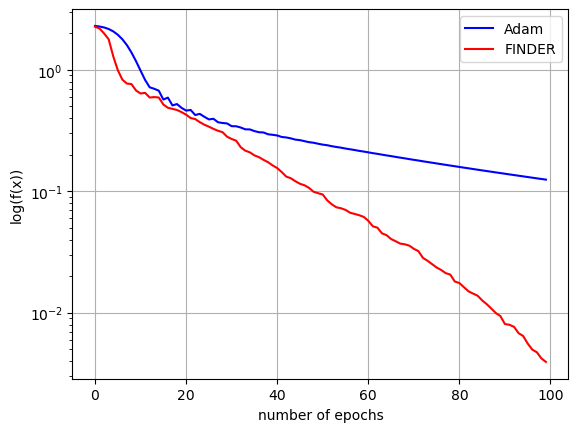

In [21]:
import matplotlib.pyplot as plt
plt.plot(fX_adam_mnist,'b', label='Adam')
plt.plot(fX_mnist_FINDER,'r', label = 'FINDER')
plt.xlabel('number of epochs')
plt.ylabel('log(f(x))')
plt.yscale('log')
plt.legend()
# plt.title('MNIST problem \n N = 109386')
plt.grid()
plt.show()